Dataset found at kaggle : https://www.kaggle.com/datasets/abdullah0a/telecom-customer-churn-insights-for-analysis/data

In [1]:
import pandas as pd
data = pd.read_csv("../Datasets/customer_churn_data.csv")


Display of the data

In [2]:
display(data.head())
display(data.tail())


,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes
999,1000,50,Male,1,56.67,Month-to-Month,NaN,56.67,No,Yes


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


Since we have NaN values, we must fill them 

In [4]:
data["InternetService"] = data["InternetService"].fillna("")


Check for duplicates

In [5]:
data.duplicated().sum()


0

Get a general description of the dataset

In [6]:
data.describe()


,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


We may need to look for a correlation of those entries

In [7]:
num_col_data = data.select_dtypes(include=['number'])



Correlation varies from 
-1 strong negative
-1 strong positive

In [8]:
#different cell cause another dataset may be big enough to slow the machine  
num_col_data.corr()


,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


We not get info for the churn

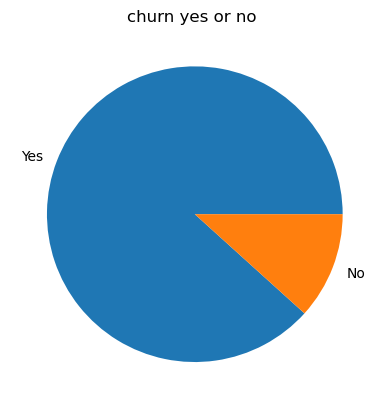

In [9]:
import matplotlib.pyplot as plt
data["Churn"].value_counts().plot(kind="pie")
plt.title("churn yes or no ")
plt.ylabel("")
plt.show()


Lets do some groupby 

In [10]:
display(data.groupby("Churn")["MonthlyCharges"].mean())
display(data.groupby(["Churn","Gender"])["MonthlyCharges"].mean())
display(data.groupby("Churn")["Tenure"].mean())
display(data.groupby("Churn")["Age"].mean())


Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

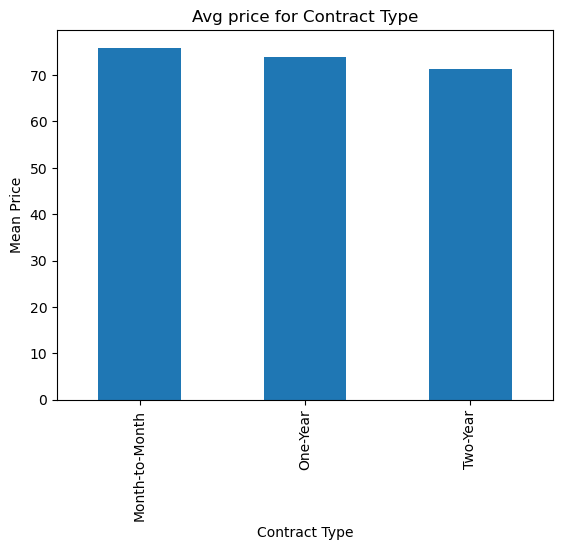

In [11]:
data.groupby(["ContractType"])["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
plt.title("Avg price for Contract Type")
plt.show()


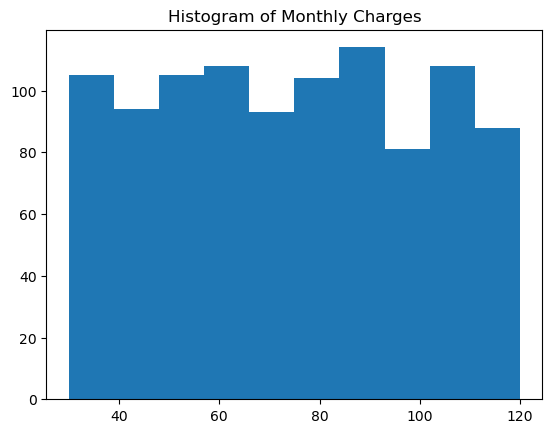

In [12]:
plt.hist(data["MonthlyCharges"])
plt.title("Histogram of Monthly Charges")
plt.show()


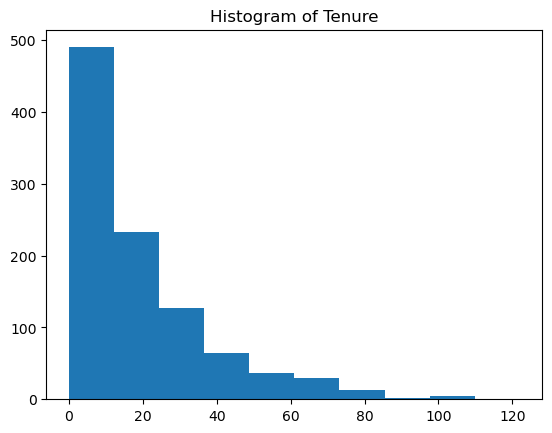

In [13]:
plt.hist(data["Tenure"])
plt.title("Histogram of Tenure")
plt.show()


Now we can start messing with the data to get more info 

In [14]:
data.columns


Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [15]:
y = data[["Churn"]]
X = data[['Age', 'Gender', 'Tenure', 'MonthlyCharges']]


In [16]:
display(X)
display(y)


,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


From strings to Value
1 -> Female / Yes
0 -> Male / No

In [17]:
#X.loc[:, "Gender"] = X["Gender"].apply(lambda x: 1 if x == "Female" else 0)

#y.loc[:, "Churn"] = y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)
X[ "Gender"] = X["Gender"].apply(lambda x: 1 if x == "Female" else 0)
y["Churn"] = y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)


/tmp/ipykernel_222650/3118217592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[ "Gender"] = X["Gender"].apply(lambda x: 1 if x == "Female" else 0)
/tmp/ipykernel_222650/3118217592.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Churn"] = y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)


Start the trainin arc

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
scaler = StandardScaler()
OneHotEncoder().fit_transform(X)
OneHotEncoder().fit_transform(y)

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)


In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


Save the scaler in case its needed

In [20]:
import joblib
joblib.dump(scaler, "Scaler.plk")


['Scaler.plk']

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()


In [42]:
y_train["Churn"].value_counts()
y_train = y_train.values.ravel()


In [43]:
log_model.fit(X_train,y_train)


LogisticRegression()

We start the prediction on the Model 

In [44]:

y_pred = log_model.predict(X_test)


In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)



0.89

K neighbor classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    "n_neighbors" :[3,5,7,9],
    "weights": ["uniform","distance"]
}
gridkn = GridSearchCV(KNeighborsClassifier(),param_grid,cv = 5)


In [49]:
gridkn.fit(X_train,y_train)
gridkn.best_params_


{'n_neighbors': 5, 'weights': 'distance'}

In [52]:
y_predkn = gridkn.predict(X_test)
accuracy_score(y_test,y_predkn)


0.87

Prediction using SVC

In [53]:
from sklearn.svm import SVC
 
svm = SVC()
param_grid_svc = {
    "C" : [0.01,0.1,0.5,1],
    "kernel" : ["linear","rbf","poly"] 
}
gridsvc=GridSearchCV(svm, param_grid_svc, cv = 5) 
gridsvc.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [54]:
gridsvc.best_params_


{'C': 0.01, 'kernel': 'linear'}

In [55]:
y_predsvm= gridsvc.predict(X_test)
accuracy_score(y_test,y_predsvm)


0.895

Decision Tree classifier 

In [56]:
from sklearn.tree import DecisionTreeClassifier

param_grid_tree = {
    "criterion" : ["gini", "entropy"],
    "splitter" : ["best","random"] ,
    "max_depth" :[None, 10, 20, 30],
    "min_samples_split" :[2,5,10],
    "min_samples_leaf" :[1,2,4],
    
}

grid_tree = GridSearchCV (DecisionTreeClassifier(),param_grid_tree,cv = 5)

grid_tree.fit(X_train,y_train)
print("best params :", grid_tree.best_params_)

y_pred_tree = grid_tree.predict(X_test)
accuracy_score(y_test,y_pred_tree)



best params : {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}


0.86

Random forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()

param_grid_rfc = {
    "n_estimators" : [32,64,128,256],
    "max_features" : [2,3,4] ,
    "bootstrap" :[True,False],
    
    
}

grid_rfc = GridSearchCV (rfc_model,param_grid_rfc,cv = 5)

grid_rfc.fit(X_train,y_train)
print("best params :", grid_rfc.best_params_)

y_pred_rfc = grid_rfc.predict(X_test)
accuracy_score(y_test,y_pred_rfc)


best params : {'bootstrap': True, 'max_features': 2, 'n_estimators': 32}


0.855

In [58]:
best_model = gridsvc.best_estimator_
joblib.dump(best_model,"best_model.pkl")


['best_model.pkl']